In [2]:
import ROOT
import math
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
BASEDIR = '/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016/Nominal/combined/'

In [58]:
b1k = uproot.open(BASEDIR + 'b1k.root')

### E matrix

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f94d1d42e30>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f94d1d431f0>, text=[])

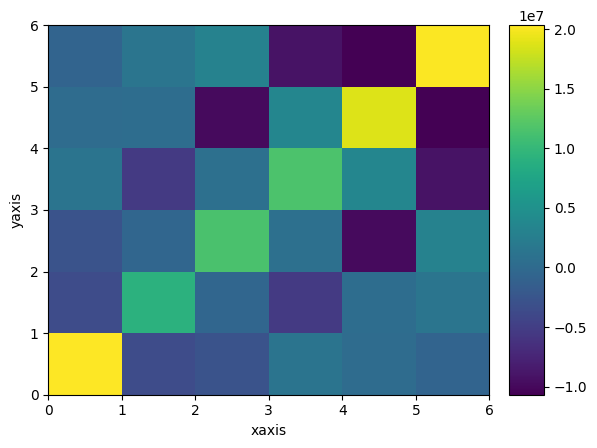

In [59]:
b1kEmatrix = b1k['b1kEmatrix_rebinnedA'].to_numpy()[0]
b1k['b1kEmatrix_rebinnedA'].to_hist().plot()

### Corr matrix

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f94d1c2da20>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f94d1c5d690>, text=[])

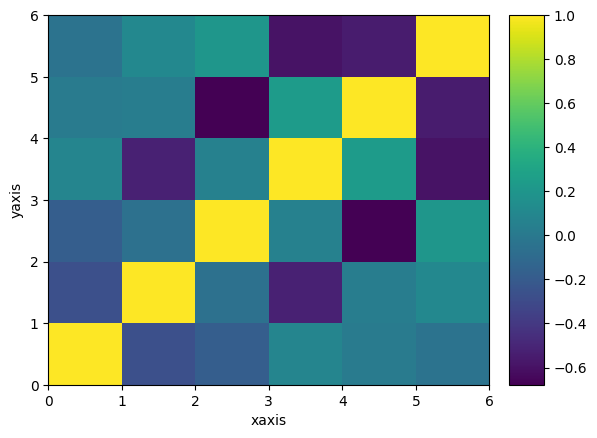

In [60]:
b1kCorrmatrix = b1k['b1kCorrmatrix_rebinnedA'].to_numpy()[0]
b1k['b1kCorrmatrix_rebinnedA'].to_hist().plot()

In [61]:
# Extract diagnols
sigma_diag   = np.array([math.sqrt(b1kEmatrix[i][i]) for i in range(6)])
sigma_matrix = np.zeros((6,6))

for i in range(6) : 
    sigma_matrix[i][i] = sigma_diag[i]

In [62]:
b1k_Ematrix_from_corr = np.matmul(np.matmul(sigma_matrix, b1kCorrmatrix), sigma_matrix.T)

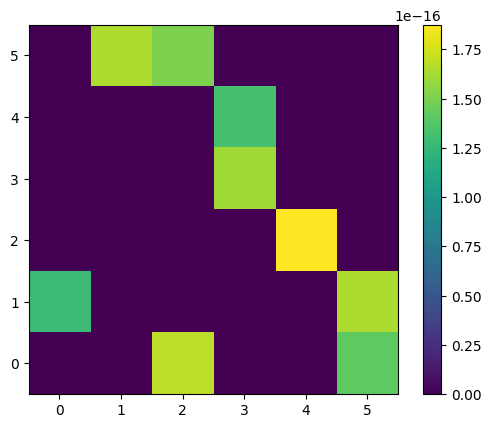

In [63]:
diff = b1k_Ematrix_from_corr - b1kEmatrix
rel_diff = diff/ (b1kEmatrix)
plt.imshow(abs(rel_diff), origin='lower')
plt.colorbar()

### Load in self corr matrix 1000PE

In [64]:
Corr_from_toys =  np.loadtxt('Correlation_matrix_1000PE_newvars1D.txt')

In [65]:
b1k_Corr_from_toys = Corr_from_toys[0:6, 0:6]
b1k_Corr_from_toys

array([[ 1.      , -0.306705, -0.084285,  0.114134, -0.047553, -0.011803],
       [-0.306705,  1.      , -0.190792, -0.473843,  0.177446,  0.035042],
       [-0.084285, -0.190792,  1.      , -0.024352, -0.662309,  0.269773],
       [ 0.114134, -0.473843, -0.024352,  1.      ,  0.01906 , -0.483556],
       [-0.047553,  0.177446, -0.662309,  0.01906 ,  1.      , -0.585593],
       [-0.011803,  0.035042,  0.269773, -0.483556, -0.585593,  1.      ]])

In [66]:
b1k_Ematrix_from_toys = np.matmul(np.matmul(sigma_matrix, b1k_Corr_from_toys), sigma_matrix.T)

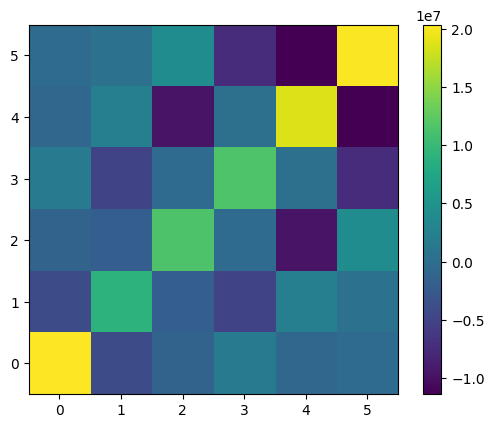

In [67]:
plt.imshow(b1k_Ematrix_from_toys, origin='lower')
plt.colorbar()

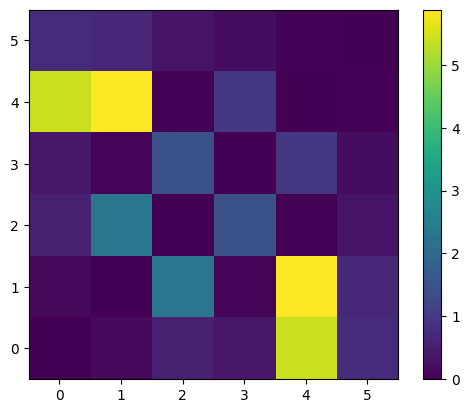

In [68]:
diff     = b1k_Ematrix_from_toys - b1kEmatrix
rel_diff = (b1k_Ematrix_from_toys - b1kEmatrix)/ (b1kEmatrix)
plt.imshow(abs(rel_diff), origin='lower')
plt.colorbar()

In [69]:
np.max(rel_diff, axis=1)

array([0.37396155, 5.87605122, 2.30888973, 0.37396155, 5.87605122,
       0.3285769 ])

In [70]:
b1k_Ematrix_from_toys

array([[ 20354280.31813782,  -4169342.82883038,  -1288990.0605074 ,
          1752050.9837571 ,   -927124.90609412,   -239493.71970085],
       [ -4169342.82883038,   9078994.44734611,  -1948724.46511011,
         -4857996.19771921,   2310561.54386022,    474877.51545022],
       [ -1288990.0605074 ,  -1948724.46511011,  11490602.55895595,
          -280872.91583448,  -9702072.37465606,   4112858.13592529],
       [  1752050.9837571 ,  -4857996.19771921,   -280872.91583448,
         11577309.72750795,    280258.7457389 ,  -7399876.11403626],
       [  -927124.90609412,   2310561.54386022,  -9702072.37465606,
           280258.7457389 ,  18675184.59838585, -11381570.02858024],
       [  -239493.71970085,    474877.51545022,   4112858.13592529,
         -7399876.11403626, -11381570.02858024,  20227755.38429467]])

In [71]:
b1kEmatrix

array([[ 20354280.31813782,  -3638680.33351428,  -2756173.49266582,
          1275181.963599  ,    210533.20154607,   -824354.35869941],
       [ -3638680.33351428,   9078994.44734611,   -588936.05464491,
         -5362861.79254956,    336030.29840323,   1413253.14768972],
       [ -2756173.49266582,   -588936.05464491,  11490602.55895595,
           613246.41809566,  -9933636.31711498,   3095686.91728816],
       [  1275181.963599  ,  -5362861.79254955,    613246.41809566,
         11577309.72750795,   3509204.63686586,  -9150514.53539125],
       [   210533.20154607,    336030.29840323,  -9933636.31711498,
          3509204.63686586,  18675184.59838585, -10688038.70780812],
       [  -824354.35869941,   1413253.14768972,   3095686.91728816,
         -9150514.53539125, -10688038.70780812,  20227755.38429467]])

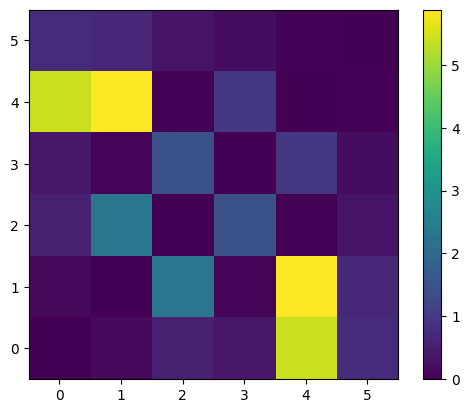

In [72]:
diff     = b1k_Corr_from_toys - b1kCorrmatrix
rel_diff = (b1k_Corr_from_toys - b1kCorrmatrix)/ (b1kCorrmatrix)
plt.imshow(abs(rel_diff), origin='lower')
plt.colorbar()

In [73]:
b1k_Corr_from_toys

array([[ 1.      , -0.306705, -0.084285,  0.114134, -0.047553, -0.011803],
       [-0.306705,  1.      , -0.190792, -0.473843,  0.177446,  0.035042],
       [-0.084285, -0.190792,  1.      , -0.024352, -0.662309,  0.269773],
       [ 0.114134, -0.473843, -0.024352,  1.      ,  0.01906 , -0.483556],
       [-0.047553,  0.177446, -0.662309,  0.01906 ,  1.      , -0.585593],
       [-0.011803,  0.035042,  0.269773, -0.483556, -0.585593,  1.      ]])

In [74]:
np.round(b1kCorrmatrix,6)

array([[ 1.      , -0.267668, -0.180222,  0.083069,  0.010798, -0.040627],
       [-0.267668,  1.      , -0.05766 , -0.523087,  0.025806,  0.104286],
       [-0.180222, -0.05766 ,  1.      ,  0.053169, -0.678117,  0.203054],
       [ 0.083069, -0.523087,  0.053169,  1.      ,  0.238656, -0.597954],
       [ 0.010798,  0.025806, -0.678117,  0.238656,  1.      , -0.54991 ],
       [-0.040627,  0.104286,  0.203054, -0.597954, -0.54991 ,  1.      ]])

In [78]:
diff[diff > 0.03]

array([0.09593678, 0.03106472, 0.04924397, 0.15163962, 0.09593678,
       0.06671889, 0.03106472, 0.04924397, 0.11439809, 0.15163962,
       0.06671889, 0.11439809])

In [77]:
1/math.sqrt(1000)

0.03162277660168379